In [2]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import KFold, cross_val_score

In [3]:
pd.set_option('max_columns', None)
df_train = pd.read_csv('train_2.csv', low_memory=False, index_col='Unnamed: 0')
df_train.shape

(225000, 34)

In [4]:
rows_with_missing = [row for row in df_train.index if df_train['compliance'].isnull()[row]]

In [5]:
columns_drop = ['violation_zip_code', 'non_us_str_code', 'grafitti_status', 'compliance_detail', 
                'payment_amount', 'balance_due', 'payment_date', 'payment_status', 'collection_status']
df_train = df_train.drop(columns_drop, axis=1)
df_train = df_train.drop(rows_with_missing, axis=0)
df_train.shape

(144528, 25)

In [6]:
df_test = pd.read_csv('test_2.csv', index_col='Unnamed: 0')
df_test = df_test.drop(['violation_zip_code', 'non_us_str_code', 'grafitti_status'], axis=1)
df_test.shape

(25305, 24)

In [7]:
passes_num = ['mailing_address_str_number', 'zip_code', 'fine_amount']
passes_cat = ['violator_name', 'mailing_address_str_name', 'state']
passes_date = ['hearing_date']

In [8]:
df_train[passes_num] = df_train[passes_num].fillna(method='ffill')
df_train[passes_cat] = df_train[passes_cat].fillna(method='ffill')
df_train[passes_date] = df_train[passes_date].fillna(method='ffill')

In [9]:
num_variables = ['ticket_id', 'violation_street_number', 'mailing_address_str_number', 'fine_amount', 'admin_fee',
                 'state_fee', 'late_fee', 'discount_amount', 'clean_up_cost', 'judgment_amount']

In [10]:
y = df_train['compliance']
X = df_train[num_variables]
X.dtypes

ticket_id                       int64
violation_street_number       float64
mailing_address_str_number    float64
fine_amount                   float64
admin_fee                     float64
state_fee                     float64
late_fee                      float64
discount_amount               float64
clean_up_cost                 float64
judgment_amount               float64
dtype: object

In [11]:
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

In [15]:
arr = []
for i in [1, 10, 25, 50, 100, 250]:
    gbm_model = GradientBoostingClassifier(n_estimators=i, random_state=42)
    gbm_model.fit(X, y)
    score = cross_val_score(gbm_model, X, y, cv=kfold, scoring='roc_auc')
    arr.append(score.mean())

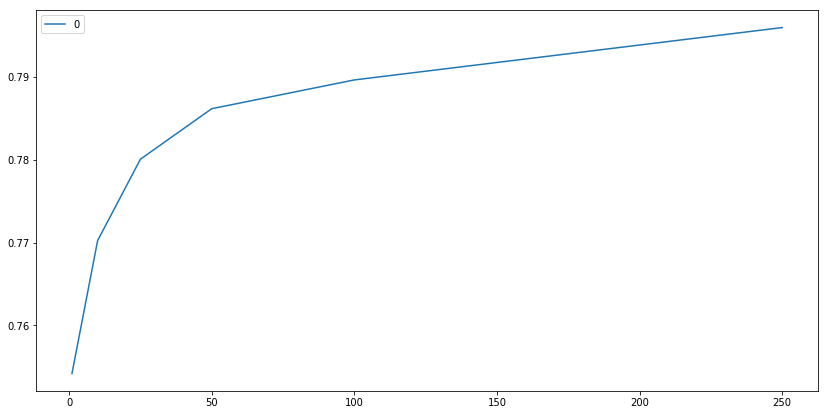

In [36]:
arr_df = pd.DataFrame(arr, [1, 10, 25, 50, 100, 250])
arr_df.plot.line(figsize=(14, 7))